In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix

In [2]:
df = pd.read_csv('stroke_data.csv')
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [3]:
df.isnull().sum()

sex                  3
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [4]:
df.shape

(40910, 11)

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(40907, 11)

In [7]:
df.isnull().sum()

sex                  0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


<Axes: xlabel='stroke', ylabel='count'>

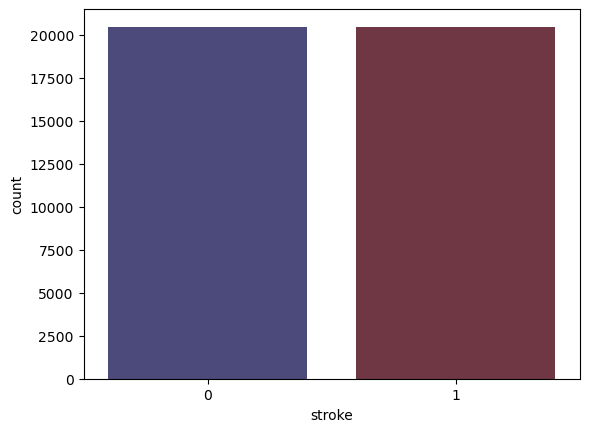

In [15]:
sns.countplot(x = 'stroke', data = df, palette='icefire')

<Axes: >

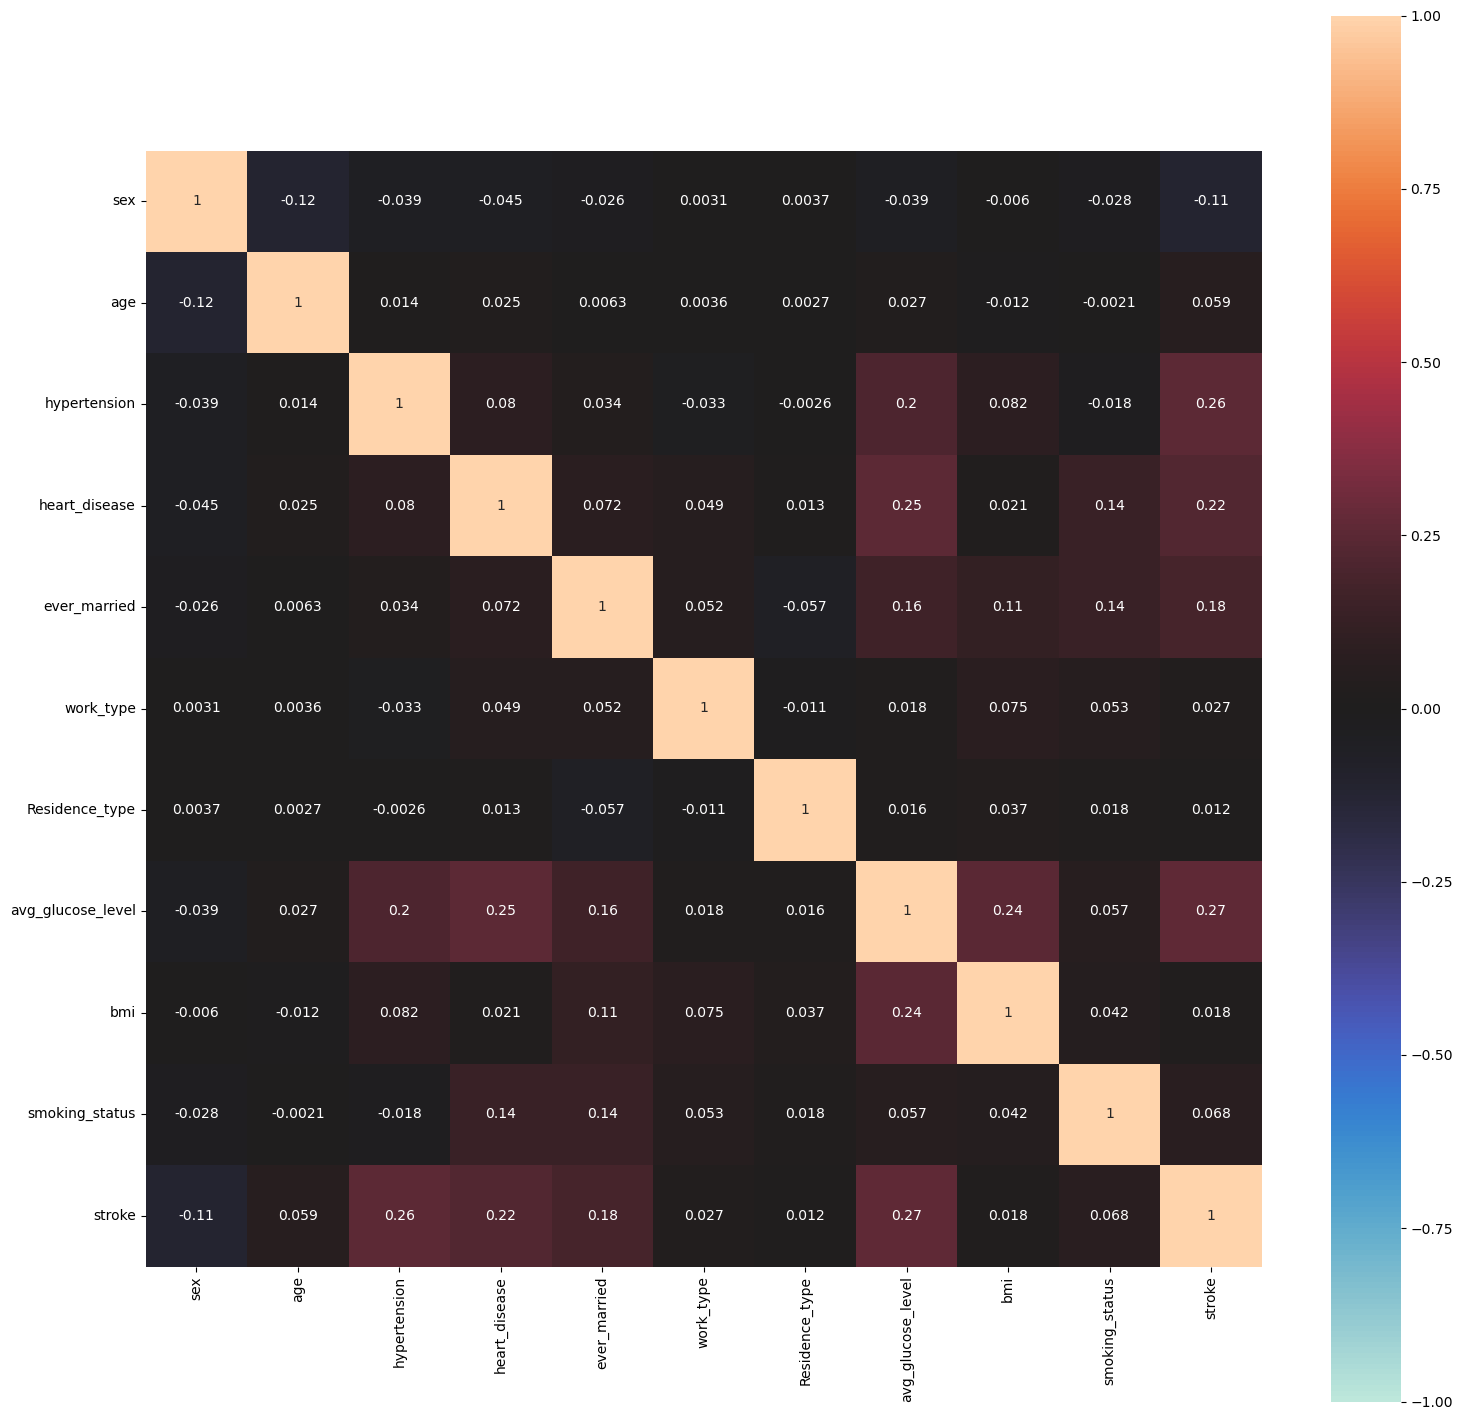

In [14]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),vmin=-1, vmax=1,cmap='icefire',annot=True, square=True)

C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Aakash\anaconda3\Lib\site-packages\seaborn\categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

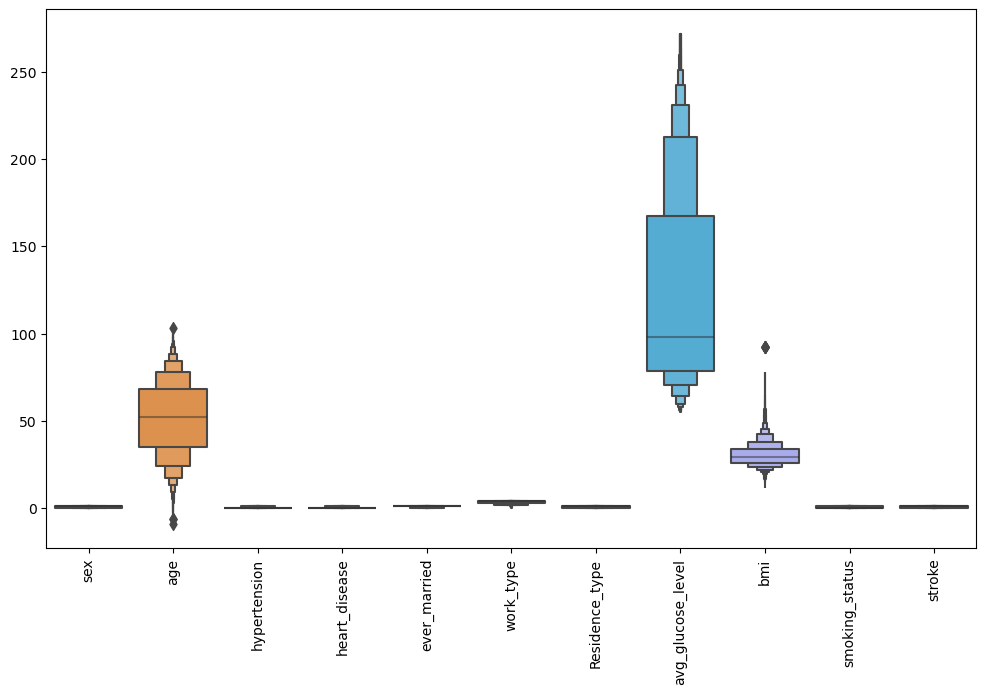

In [16]:
plt.figure(figsize=(12,7))
sns.boxenplot(data = df)
plt.xticks(rotation=90)
plt.show()

In [17]:
x = df.drop('stroke', axis=1)
y = df['stroke']

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
rf_model = RandomForestClassifier(n_jobs=-1,random_state=42,max_depth=10,max_leaf_nodes= 80,n_estimators = 30)
dt_model = DecisionTreeClassifier(random_state = 42,max_depth=7,max_leaf_nodes=30)
logistic_model = LogisticRegression()

In [22]:
rf_model.fit(xtrain, ytrain)


RandomForestClassifier(max_depth=10, max_leaf_nodes=80, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [21]:
dt_model.fit(xtrain, ytrain)


DecisionTreeClassifier(max_depth=7, max_leaf_nodes=30, random_state=42)

In [20]:
logistic_model.fit(xtrain, ytrain)

C:\Users\Aakash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
rf_score = rf_model.score(xtest, ytest)
dt_score = dt_model.score(xtest, ytest)
logistic_score = logistic_model.score(xtest, ytest)

In [25]:
print('Random Forest Classifier Score : ', rf_score)
print('Decission Tree Classifier Score : ', dt_score)
print('Logistic Regression Score : ', logistic_score)

Random Forest Classifier Score :  0.8265705206550965
Decission Tree Classifier Score :  0.7533610364214128
Logistic Regression Score :  0.6802737716939623


In [26]:
y_pred = rf_model.predict(xtest)

<Axes: >

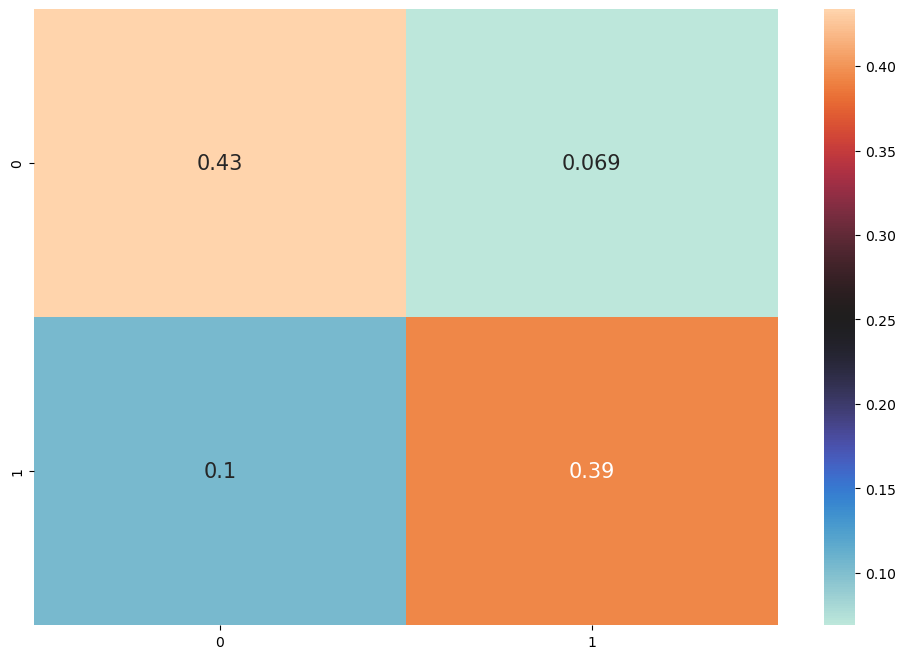

In [27]:
# confusion matrix
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(ytest, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = 'icefire', annot = True, annot_kws = {'size':15})

In [28]:
import pickle

# Assuming 'model' is the trained RandomForestRegressor
with open('stroke_rfmodel.pkl', 'wb') as file:
    pickle.dump(dt_model, file)